Cross Validation:

In [3]:
#Import bunch of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter

In [39]:
# =================== Data Preprocessing =========================
df=pd.read_csv("ushape.csv")
x=np.array(df.iloc[:,0:2])
y=np.array(df["class"])

Simple Cross Validation:

In [40]:
# Split the data into train and test
x_1,x_test,y_1,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Split the training data into CV train and cross validate
x_tr,x_cv,y_tr,y_cv=train_test_split(x_1,y_1,test_size=0.3,random_state=42)
# consider odd numbers from 0 to 29
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_cv)
    # check the accuracy on CV data
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    print("\nAccuracy with k=%d is %d%%" %(i,acc))


Accuracy with k=1 is 90%

Accuracy with k=3 is 90%

Accuracy with k=5 is 90%

Accuracy with k=7 is 90%

Accuracy with k=9 is 90%

Accuracy with k=11 is 85%

Accuracy with k=13 is 85%

Accuracy with k=15 is 85%

Accuracy with k=17 is 85%

Accuracy with k=19 is 85%

Accuracy with k=21 is 85%

Accuracy with k=23 is 85%

Accuracy with k=25 is 85%

Accuracy with k=27 is 85%

Accuracy with k=29 is 85%


In [41]:
# With the optimal K finding above(as small as possible),we test on unknown data(i.e, test data)
neigh=KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_tr,y_tr)
pred=neigh.predict(x_test)
acc=accuracy_score(y_test,pred,normalize=True)*float(100)
print("Accuracy on test data with k =1 is %d%%" %acc)

Accuracy on test data with k =1 is 93%


10-fold Cross Validation:

Optimal value of K is 3


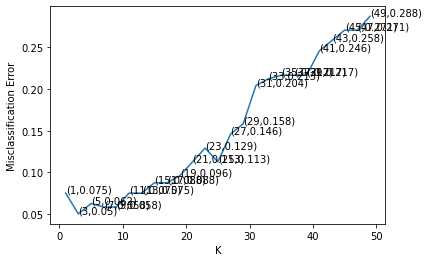

Misclassification error for each K value is [0.075 0.05  0.062 0.058 0.058 0.075 0.075 0.088 0.088 0.096 0.113 0.129
 0.113 0.146 0.158 0.204 0.213 0.217 0.217 0.217 0.246 0.258 0.271 0.271
 0.288]


In [47]:
# Creating odd list of K for K-NN
MyList=list(range(0,50))
Neighbors=list(filter(lambda x:x%2!=0,MyList))
# Empty list to store CV score
cv_score=[]
# perform 10-fold cross validation
for k in Neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_1,y_1,cv=10,scoring="accuracy")
    cv_score.append(scores.mean())
# Misclassification Error
MSE=[1-x for x in cv_score]
# finding optimal K
optimal_k=Neighbors[MSE.index(min(MSE))]
print("Optimal value of K is %d" %optimal_k)
# plot MSE vs K
plt.plot(Neighbors,MSE)
for xy in zip(Neighbors,np.round(MSE,3)):
    plt.annotate("(%s,%s)" %xy,xy=xy,textcoords="data")
plt.xlabel("K")
plt.ylabel("Misclassification Error")
plt.show()
print("Misclassification error for each K value is",np.round(MSE,3))

In [50]:
# Testing the accuracy on unknown data with optimal K
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(x_1,y_1)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred,normalize=True)*float(100)
print("Accuracy on test data with optimal K = %d is %f%%" %(optimal_k,acc))

Accuracy on test data with optimal K = 3 is 93.333333%
